
#**PROBABILITY AND PROBABILITY DISTRIBUTIONS:**

##Notebook of Week 1 of PRA3500: Statistics/Data Analysis for Physicists

#Part 1: Probability Relations

Instructions:

"*Consider a test which looks for COVID-19 antibodies in the
general population. Let’s assume that 1% of our general population has these antibodies. If we can make a test which is 99% sensitive to the antibodies (i.e. we can
tell 99% of cases as true positives, 1% as false negatives) and give 95% true
negative results (5% are accidentally given a positive result) – it looks like we might be doing pretty well.*"

**Task 1**: Use your programming tool of choice and make a small script which accepts
these data as inputs and returns the probability of a positive test indicating
correctly that this person does indeed have the anti-bodies. 

In [53]:
"""
finding the probability of a positive test correctly indicating the presence of antibodies AND the probability of a negative test correctly indicating the non-presence of antibodies (extra effort!)

"""

#GIVEN INFORMATION
p=0.01 #true positive (the person really has antibodies)
n=0.99 #true negative (the person really does not have antibodies)
a=0.99 #if a person has antibodies, the probability that it will also test as pozitive 
b=0.95 #if it does not have antibodies, the probability that the person will also test negative

#CALCULATIONS
p_t=p*a + n*(1-b) #test result positive ("a" amount of people with antibodies (p) and "(1-b)"" amount of people without antibodies (n) will test positive)
n_t=n*b + p*(1-a) #test result negative ("b" amount of people without antibodies (n) and "(1-a)"" amount of people with antibodies (p) will test negative)

#Check (error if #calculations are wrong)
def unity(): 
  u=p_t+n_t #should be 1
  if u!=1:
    return(print("Error in calculations. Sum of positive and negative outcomes of the test does not equal the total number of tests taken.")) 
  if u==1:
    pass
unity()

#RESULTS
#probability of a positive test indicating correctly that this person does indeed has the anti-bodies (a_rev)
a_rev=a*p/p_t #Bayes' theorem (explanation can be found in chapter 2 (equation 2.4) of Bohm's Introduction to Statistics and Data Analysis for Physicists)
#probability of a negative test indicating correctly that this person does indeed does not have the anti-bodies (b_rev)
b_rev=b*n/n_t #Bayes' theorem

#PRINT
print("The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is ", a_rev, ".")
print("The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is ", b_rev, ".")

The probability of a positive test indicating correctly that this person does indeed has the anti-bodies is  0.16666666666666655 .
The probability of a negative test indicating correctly that this person indeed does not have the anti-bodies is  0.9998936848819903 .


###Interpretation of results: Task 1

The results show that the probability of a positive test indicating correctly that a person does indeed have the anti-bodies is just below 17%. From this we can conclude that the positive outcomes of the test are not to be blindly trusted (most probably that person does not have antibodies, despite the test showing otherwise). On the other hand, if the results of the test are negative, we can be very sure that they are correct. Within the precision of the data given in the task, we can even be sure with 100% certainty that if the results of the test be negative, the person does not have antibodies. 

If this was a real-world situaton, I would recommend that in case of a test coming out as positive, multiple (or alternative) tests be repeated/performed on that person, as the positive result is clearly not a good indicator of the presence of antibodies. Just about 1 in 6 people testing positive would actually have antibodies. If I had limited resources (as one does in real-life) I would on the other hand not repeat tests on cases that turned out negative, as those results clearly are much more accurate.

It is also worthwhile to note that approximately 5/6 people that tested positive for antibodies will not have antibodies, and if the results of the test are to be trusted blidly, then those people will not get vaccinated and might consequently catch the virus later on, which will not make them happy. So, the statistical analysis must be taken into account when making decisions (when to repeat the test, when to vaccinate).

**Task 2**: Using the same testing kit, how much higher would the fraction of
people with the antibodies have to be in order to give a >50% chance of the kit
giving a positive result? It might be nice to make a graph of this.

The task will be completed in 2 ways. Firstly, using as little hand calculations as possible. In this method, "k" (=percent of population with antbodies) will be discretely increasing in small amounts. When the chances of kit giving a positive result will be 50%, this will be printed out. The accuracy od the limiting k will depend on how small these increasing amounts are (the smaller the better for the accuracy, but the smaller the worse for the amount of time the code takes to run). As k and resulting positive test outcome will have increased untill k reaches 100, the plot will also be drawn.

The second approach consisted of a small hand calculation to obtain the expression for a function "test turning out positive" which explicitly depends on k. This is slightly easier to code, and the code runs a bit quicker, which is noticable on slow laptops. It is also easier to read off what the value of k must be for test turning out positive in 50% of cases. This approach which required a small hand calculation was motivated by two things: (1) code is quicker and neater and (2) having the explicit equation for k allowed for an easy calculation of k exactly (**not** depending on the smallness of the steps used to make a graph). But the first approach was kept in just to show that it's easy enough to do the task without having done that hand calculation as well. (extra effort!)

In [0]:
#IMPORTS
import matplotlib.pyplot as plt  #import library
import numpy as np

#make a function that draws graphs
def simple_graph(independent_variable, dependent_variable):
  plt.plot(k_array, p_t_1) #make graph
  plt.xlabel('percent of people with antibodies')  #name axis
  plt.ylabel('percent of people tested positive') #name axis 
  plt.grid() #add grid so it's easier to read off the results
  plt.title('Percent of people testing positive depending on the percent of people having antibodies') #give title
  plt.show() #show graph

When at least about  47.87  percent of population will have antibodies, test will give positive result in 50% of cases.


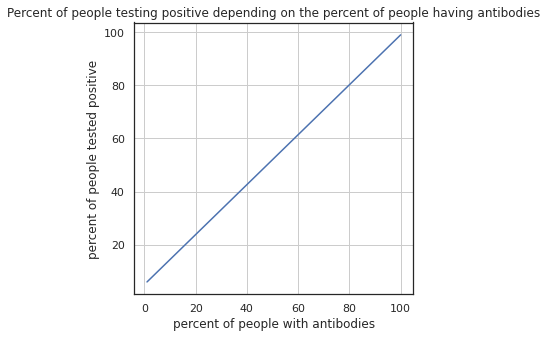

In [55]:
#IMPLICIT WAY OF MAKING GRAPH (as little hand calculations as possible)
#create arrays of the function p_t_1 (test turning out positive) and the variable k (corresponds to the percent of people with antibodies)
p_t_1 = []
k_array = []
count = 0
for k in np.arange(1, 100, 0.005): #k is slowly increasing 
  k_array.append(k)
  p_1=p*k #true positive (the person really has antibodies; variable)
  n_1=1-k*p #true negative (the person really does not have antibodies; expression immediately follows from p_1 expression in terms of k)
  p_t_1.append((p_1*a + n_1*(1-b))*100) #recalculate positive results, with k free parameter
  if 50<p_t_1[count]<50.005: #to make it print out just once
    print("When at least about ", round(k, 2), " percent of population will have antibodies, test will give positive result in 50% of cases.")
  count+=1
simple_graph(k_array, p_t_1)

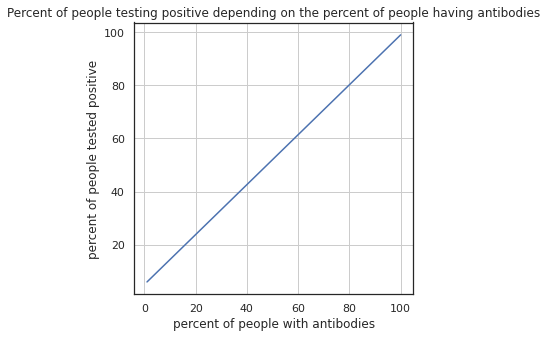

When  47.87 % of population will have antibodies, the test will turn out to be positive in 1/2 cases.


In [56]:
#EXPLICIT WAY OF MAKING GRAPH (small calculation by hand, handy outcomes; y=p_t_1)
y = []
for k in k_array:
  y.append(0.0094*k+0.05)
simple_graph(k_array, y)

#Calculating k explicitly
k=round(((0.5-0.05)/0.0094), 2)
print("When ", k, "% of population will have antibodies, the test will turn out to be positive in 1/2 cases.")

###Interpretation of Part 2

We can see that the amount of the positive outcomes is linearly increasing with the increasing percent of people in the population that have antibodies. We can also see (explicitly if one just prints out all the independent and their corresponding dependent values) that as k is increasing, the portion of positive outcomes correctly indicating that the person has antibodies is increasing. At k=100, a glance at the explicit equation for the graph above (y) shows that the test fails at only 1% of the population, as was already given in the exercise. (The last observation can also be used as an additional check that my mathematics is correct). 

The whole exercise clearly has relevance to real-world problems. It gives you information on how accurate the results of your testing really are in different scenarios, which is needed for making reasonable decisions on how to spend the resources, as discussed above. It also shows that the accuracy of our results depends on the estimate of the number of people with antibodies, showing the need for an accurate estimate of that last number.

# Part 2: Probability Distributions

**Task 1**: Make a script to generate a discrete distribution, with values in the integer
bins. The script should be able to generate a Gaussian, Bionomial, Poisson and an
Exponential distribution – it should always use the same range of values to do so
(i.e. the x-axis should run from 0 to 10 for example).

**Task 2**: Choose one of the distributions from the task above and make it into a
continuous distribution. You may have to bin it into a histogram to be able to plot
it.

In [0]:
# IMPORT STATEMENTS FOR LIBRARIES

%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("white")

In [0]:
#IMPORT STATEMENTS FOR DIFFERENT DISTRIBUTIONS

mysize=1000

from scipy.stats import norm
data_normal = norm.rvs(size=mysize,loc=5,scale=1)

from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=mysize)

from scipy.stats import poisson
data_poisson = poisson.rvs(mu=2.5, size=mysize)

from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.48,size=mysize)

In [0]:
#DEFINING FUNCTIONS FOR GRAPHS FOR DISCRETE AND CONTINUOUS DISTRIBUTIONS

#discrete distribution
def plot_graph(which_data, x_axis): #for x_axis write the type of distribution as a string
  ax = sns.distplot(which_data,
                  bins=10,
                  norm_hist=True,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel=x_axis, ylabel="probability", xlim=(0,10))

#continuous distribution
def plot_continuous(which_data, x_axis): #for x_axis write the type of distribution as a string
  bx = sns.distplot(which_data,
                bins=10,
                hist=False,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth": 15,'alpha':1})
  bx.set(xlabel=x_axis, ylabel='probability', xlim=(0,10))

Below normalised graphs for the gaussian, exponential, poisson and binomial distributions will be generated respectively. For each type of distribution, firstly dicrete and secondly continuous graph will be plotted. (all continuous graphs will be plotted - extra effort!)

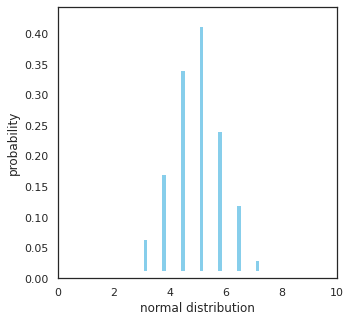

In [60]:
plot_graph(data_normal, "normal distribution")

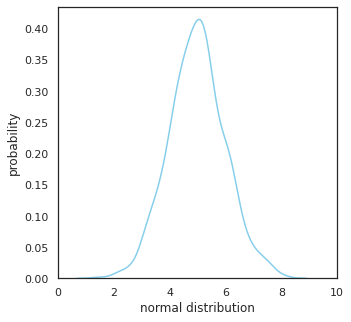

In [61]:
plot_continuous(data_normal, "normal distribution")

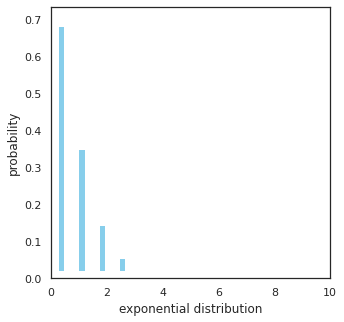

In [62]:
plot_graph(data_expon, "exponential distribution")

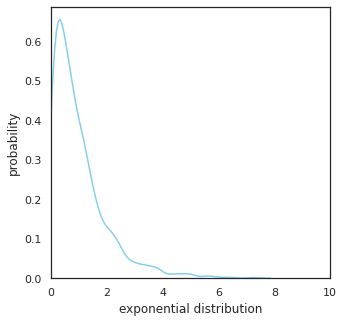

In [63]:
plot_continuous(data_expon, "exponential distribution")

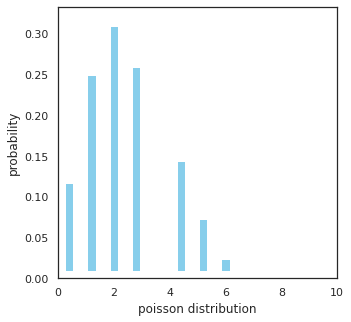

In [80]:
plot_graph(data_poisson, "poisson distribution")

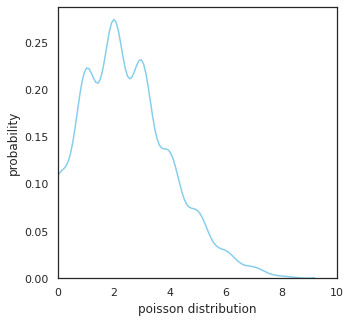

In [79]:
plot_continuous(data_poisson, "poisson distribution")

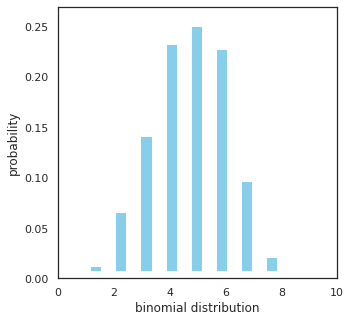

In [66]:
plot_graph(data_binom, "binomial distribution") 

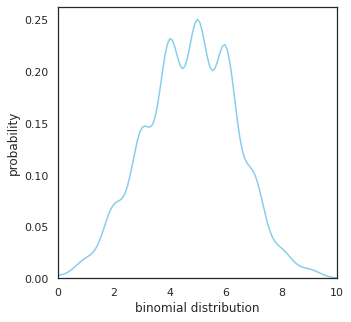

In [67]:
plot_continuous(data_binom, "binomial distribution")

**Follow up task**: Modify your script to accept two values and return the sum of the
probability distribution function between those values (e.g. so I could ask for the
total of the exponential distribution between 0 and 2 for example)

In [77]:
#define function that gives you the sum of probabilities between 2 values
def discrete_integral(give_your_distribution_name_string, data_type, lower_boundary, higher_boundary):
  hist,bins = np.histogram(data_type,bins = [lower_boundary, higher_boundary])
  y=sum(hist)/mysize #what portion of events take place in this region
  
  print("Chosen distribution: ", give_your_distribution_name_string)
  print("Chosen range:  ", bins) 
  print("Number of events in that chosen range: ", hist) 
  print("Probability of finding an event in your chosen range is: ", y)
  print("""
  """)


#you are welcome to modify boundaries at your will. Here I have shown that there is 100% probability that you will find your event in one of your 10 existing bins
discrete_integral("Normal Distribution", data_normal, 0, 10)
discrete_integral("Exponential Distribution", data_expon, 0, 10)
discrete_integral("Binomial Distribution", data_binom, 0, 10)
discrete_integral("Poisson Distribution", data_poisson, 0, 10)

Chosen distribution:  Normal Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Exponential Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Binomial Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  
Chosen distribution:  Poisson Distribution
Chosen range:   [ 0 10]
Number of events in that chosen range:  [1000]
Probability of finding an event in your chosen range is:  1.0

  


#Part 3: Expectation values


Expectation value is imporant, it is often the only thing we know for sure about some system. For example, in quantum mechanics that is often the case; you do not know exactly where your particle will be, but you can calculate with what probability it will be at which location and you can calculate its expectation value (side note: in QFT it gets even worse, on top of not knowing where the particle will be, there you do not even know how many particles you will have). 

If you repeat an identical experiment (for example, you measure the position of a particle in an infinite square well) for many many times (approaching infinity), then your average (location, in my example) of all your measurements is what we call the "expectation value". You can easily have cases where the probability of a particle being at the location of your expectation value is 0 (or almost zero), since *expectation value* is really the *average*; **not** the most probable value. The name is unfortunately misleading.

**Task:** Choose one of your discrete distributions and one of your continuous
distributions from the previous task. Write a small script to take the data from the
histogram and turn it into an expectation value.

In [0]:
"""
Define functions that will return expectation value of a distribution based on discrete graph ("dx=1 bin") and on a continuous graph (average) respectively.
The latter will naturally introduce less error (an additional error occurs at the "discrete case" due to large bins).
The task was evidently done for all distributions, not just 1 - extra effort!

"""

#DISCRETE DISTRIBUTIONS

def discrete_expectation(name_your_distribution_string, data_type, total_number_of_events): #if using only the distributions above, total_number_of_events=mysize 
  hist,bins = np.histogram(data_type, bins=[0,1,2,3,4,5,6,7,8,9,10]) #define boundaries of bins and get the number of events in each bin. Uncomment the following 2 lines to see this info explicitly.
  #print("bins have the following boundaries: ",bins) 
  #print("number of events in each bin: ", hist)

  #make number of events a list, where the first element means the number of events in bin 1, the second number of events in bin 2...
  events=[]
  for i in hist:
    events.append(i) 

  #calculate expectation value by multiplying the number of bin and the probability of finding an event in that bin (number of events in that bin/total number of events) and sum everything
  y=[] 
  for i in range(9):
    y.append(events[i]*(i+1)/total_number_of_events)
  expectation=sum(y)
  print("Expectation value for a discrete ", name_your_distribution_string , " : ", round(expectation,2))

#CONTINUOUS DISTRIBUTIONS

#calculate expectation value based on continuous graph, which is as far as the task is concerned simply the average of all events (graph is based on mysize number of discrete events)
def simple_average(name_your_distribution_string, data_type):
  y=sum(data_type)/len(data_type)
  print("Expectation value for a continuous ", name_your_distribution_string, " : ", y)

In [81]:
"""
Use the functions from the cell above to generate expectation values for all cases for discrete and continuous distributions.

"""

discrete_expectation("exponential distribution", data_expon, mysize)
discrete_expectation("normal distribution", data_normal, mysize)
discrete_expectation("binomial distribution", data_binom, mysize)
discrete_expectation("poisson distribution", data_poisson, mysize)

simple_average("exponential distribution", data_expon)
simple_average("normal distribution", data_normal)
simple_average("binomial distribution", data_binom)
simple_average("poisson distribution", data_poisson)


Expectation value for a discrete  exponential distribution  :  1.61
Expectation value for a discrete  normal distribution  :  5.58
Expectation value for a discrete  binomial distribution  :  5.67
Expectation value for a discrete  poisson distribution  :  3.42
Expectation value for a continuous  exponential distribution  :  1.0230351139529734
Expectation value for a continuous  normal distribution  :  5.085413240648483
Expectation value for a continuous  binomial distribution  :  4.736
Expectation value for a continuous  poisson distribution  :  2.418


In [71]:
"""
just a quick check whether my code makes sense
you can make your own distributions here to calculate the two expectation values

"""
mydata=[0,1,2,2,3,3,3,4,4,4,4, 5,5,5,5,5, 6,6,6,6,7,7,7,8,8,9,10]
discrete_expectation("check function", mydata, len(mydata))
simple_average("check function", mydata)

mydata=[0,1,2,2,3,3,3,4,4,4,4, 6,6,6,6,7,7,7,8,8,9,10]
discrete_expectation("check function 2", mydata, len(mydata))
simple_average("check function 2", mydata)

mydata=[0,5,10]
discrete_expectation("check function 3", mydata, len(mydata))
simple_average("check function 3", mydata)

Expectation value for a discrete  check function  :  5.22
Expectation value for a continuous  check function  :  5.0
Expectation value for a discrete  check function 2  :  5.05
Expectation value for a continuous  check function 2  :  5.0
Expectation value for a discrete  check function 3  :  2.33
Expectation value for a continuous  check function 3  :  5.0


####Short observation from check functions

What we can observe from this extra "check" part is that the "discrete" expectation value is closer to the "continuous" expectation value when the independent values (mydata, data_type) fit nicely in the number of bins I set (this is especially nicely seen in test fuctions - check function has a range that just does not fit the number of bins, hence small discrepancy; check function 1 has the number of possible values in range more in alignmnent with the number of bins, so the two expectation values are almost the same; function 2 has way too much bins for just 3 data points, so the discrepancy between the expectation values is huge). This was to be expected of course.

**Task**: Expectation values are also useful in understanding how game
shows work. Make a small game, which simulates the TV show deal or no deal.
There are 20 boxes (numbered 1-20). The contestant chooses one box to keep and
then opens 3 at random and gets to know the values of these boxes. What is the
expected value of the prize they go home with? They have 1 box out of 17
remaining. Make it simple – the three random boxes don’t have to be chosen by the
user – simply chosen at random from the possibilities.

In [72]:
#to see intermediate steps of the game, uncomment print statements
#game narrated in the code
#short comment on the "physics" included in the output text

import random
import statistics
boxes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #there are 20 boxes, the number of the box corresponding to the value of the prize in the box
#print(boxes)
original_box=random.choice(boxes) #contestant chooses one (=original) box randomly... 
#print(original_box)
boxes.remove(original_box) #... but puts it aside without having opened it.
#print(boxes)
box_1=random.choice(boxes) #contestant chooses the first "to be opened" box and opens it...
#print(box_1)
boxes.remove(box_1) #...and decides to keep playing the game because he/she is unhappy with the prize. The opened box is removed.
#print(boxes)
box_2=random.choice(boxes) #contestant chooses the second "to be opened" box and opens it...
#print(box_2)
boxes.remove(box_2) #...and decides to keep playing the game because he/she is unhappy with the prize. The opened box is removed.
#print(boxes)
box_3=random.choice(boxes) #contestant chooses the third, and the last "to be opened" box and opens it...
#print(box_3)
boxes.remove(box_3) #...and decides to refuse the prize because he/she is unhappy with it. Now the contestant has to go home with the prize in the unopened, original box...
#print(boxes)
boxes.append(original_box) #...he/she does not know yet what is the value of the prize. (in this step the unopened box is added to the list of other 16 yet unopened boxes).
#print(boxes)
def expectation_value(decimal):#what is the expectation value of the prize the contestant goes home with?
  y=statistics.mean(boxes) #in this particular case expectation value equals the mean (discrete dataset)
  return round(y, decimal)
#print(expectation_value(2))
print("God knows that the contestant put aside box with value ", original_box, 
      ". Then, as the whole show knows, the contestant picked and refused 3 boxes with values ", 
      box_1, ", ", box_2, " and ", box_3,  " respectively. The expectation value of the 17 unopened boxes is ", 
      expectation_value(2), ". However, ", expectation_value(0), 
      " is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes." 
      "The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value."
      " Naming 'expectation value' is unfortunately very misleding.")

God knows that the contestant put aside box with value  4 . Then, as the whole show knows, the contestant picked and refused 3 boxes with values  11 ,  7  and  12  respectively. The expectation value of the 17 unopened boxes is  10.59 . However,  11.0  is not the most likely value that's hidden in the unopened box, but purely an average of the remaining boxes.The numbers close to the mean have in this distribution really nothing to do with how likely one is to pick such a value. Naming 'expectation value' is unfortunately very misleding.


#Part 4 (optional): Messy real world

**Optional Task:** Take your script which outputs your distribution and have it print the expectation
value, the mean value, the variance, skewness and kurtosis. 

Below the mean, variance, skewness and kurtosis are generated. The expectation value has already been found above, in Part 3. At the very end, it is briefly explained what those values are, what do they tell you about your distribution, and why could we bother computing them.

In [0]:
#good programmer is a lazy programmer
#use statistics package to get information about your distributions

import scipy.stats
from scipy.stats import norm, poisson, binom, expon, skew, kurtosis

#define function that gets the desired properties using the statistics package

def LazyRealWorld(name_your_distribution_string, data_type):
  print(name_your_distribution_string)
  print("mean: {}" .format(np.mean(data_type)))
  print("variance: {}" .format(np.var(data_type)))
  print("skewness: {}" .format(skew(data_type)))
  print("kurtosis: {}" .format(kurtosis(data_type)))
  print("""
  """)

In [82]:
#get the desired properties for specific distributions

LazyRealWorld("NORMAL DISTRIBUTION", data_normal)
LazyRealWorld("POISSON DISTRIBUTION", data_poisson)
LazyRealWorld("EXPONENTIAL DISTRIBUTION", data_expon)
LazyRealWorld("BINOMIAL DISTRIBUTION", data_binom)

NORMAL DISTRIBUTION
mean: 5.085413240648484
variance: 0.9599471659276003
skewness: 0.015968261094690364
kurtosis: 0.03021293831952665

  
POISSON DISTRIBUTION
mean: 2.418
variance: 2.481276
skewness: 0.5693827488108544
kurtosis: 0.08723858600788947

  
EXPONENTIAL DISTRIBUTION
mean: 1.0230351139529725
variance: 1.023688772379426
skewness: 1.8886073097287113
kurtosis: 4.947728445037446

  
BINOMIAL DISTRIBUTION
mean: 4.736
variance: 2.4763040000000003
skewness: 0.08305125612850539
kurtosis: -0.2095335820975044

  


###Meaning of calculated quantities

Mean is the same as average which is the same as expectation value, if one does infinetely many measurements. Infinetely many measurements of the mean would give you the expectation value, as is nicely illustrated [here](https://math.stackexchange.com/a/1355657/735657).

Standard deviation is a measure of how widely spread is the distribution. The square of a standard deviation is called variance. 

Skewness is a measure of asymmetry of the distribution (for example, gaussian distribution is very symetrical and hence has very low skewness, in ideal case zero, while exponential distribution is very asymmetrical, and will hence have large skewness; it will also be a positive number since the bigger part is to the left of the graph). 

Kurtosis is a measure of a "tailedness" of the distribution. For example, if the distribution has a more narrow peak than the gaussian, kurtosis will be positive, and if the distribution has a more wide&lower peak than the gaussian, kurtosis will be negative.

By knowing these quantities we can learn quite something about the distribution without having to plot it. I would imagine this becomes quite interesting when working in higher dimensions where things are not easily visualised. Yet computing quantities like these should still give us some idea about the distribution we are working with, despite not being able to plot it and see the distribution's properties visually. Even if the data is plottable it is also very handy to have clearly defined properties of a distribution if you want to compare multiple distributions together that do not have the same range etc.